<a href="https://colab.research.google.com/github/Yyssjj96/__practice___/blob/main/adp_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('problem1.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41024 entries, 0 to 41023
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    41024 non-null  object 
 1   StockCode    41024 non-null  object 
 2   Description  41024 non-null  object 
 3   Quantity     41024 non-null  int64  
 4   InvoiceDate  41024 non-null  object 
 5   UnitPrice    41024 non-null  float64
 6   CustomerID   41024 non-null  float64
 7   Country      41024 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 2.5+ MB


In [5]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [3]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,565857,84879,ASSORTED COLOUR BIRD ORNAMENT,16,9/7/2011 14:13,1.69,14911.0,EIRE
1,560452,22432,WATERING CAN PINK BUNNY,6,7/19/2011 9:51,1.95,12682.0,France
2,578509,22492,MINI PAINT SET VINTAGE,36,11/24/2011 13:17,0.65,12705.0,Germany
3,579345,22728,ALARM CLOCK BAKELIKE PINK,8,11/29/2011 11:46,3.75,12727.0,France
4,564039,21731,RED TOADSTOOL LED NIGHT LIGHT,12,8/22/2011 12:40,1.65,12645.0,Germany
5,570672,21591,COSY HOUR CIGAR BOX MATCHES,24,10/11/2011 14:52,1.25,12536.0,France
6,562046,23346,SPACEBOY BEAKER,12,8/2/2011 10:34,1.25,12378.0,Switzerland
7,577228,23520,EMBROIDERED RIBBON REEL RUBY,1,11/18/2011 12:07,3.75,12391.0,Cyprus
8,572134,23360,SET 8 CANDLES VINTAGE DOILY,12,10/21/2011 10:13,1.95,12500.0,Germany
9,540547,C2,CARRIAGE,1,1/9/2011 16:07,50.00,14911.0,EIRE


In [6]:
customer_data = df.groupby('CustomerID').agg(
    purchase_frequency=('InvoiceNo', 'nunique'),
    total_purchase_amount=('Quantity', lambda x: (x * df.loc[x.index, 'UnitPrice']).sum())
).reset_index()

# 열 이름 변경
customer_data.rename(columns={'purchase_frequency': 'F', 'total_purchase_amount': 'M'}, inplace=True)

In [7]:
customer_data

,CustomerID,F,M
0,12348.0,4,1797.24
1,12349.0,1,1757.55
2,12350.0,1,334.40
3,12352.0,11,1545.41
4,12354.0,1,1079.40
...,...,...,...
343,14935.0,1,1784.71
344,14936.0,9,8117.42
345,14937.0,4,1617.63
346,16321.0,7,230.70


In [11]:
from sklearn.preprocessing import StandardScaler

features = customer_data[['F','M']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [12]:
# IQR 계산
Q1 = np.percentile(scaled_features, 25, axis=0)
Q3 = np.percentile(scaled_features, 75, axis=0)
IQR = Q3 - Q1

# 이상값 한계 설정
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상값을 범위 내로 조정
scaled_features = np.where(scaled_features < lower_bound, lower_bound, scaled_features)
scaled_features = np.where(scaled_features > upper_bound, upper_bound, scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

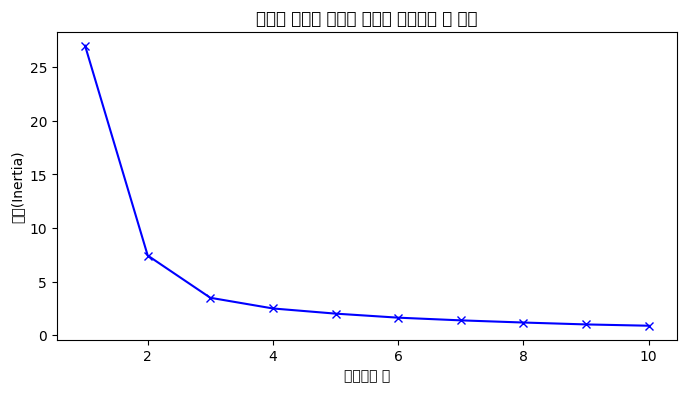

In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 최적의 클러스터 개수 찾기 (엘보우 방법)
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# 엘보우 차트 그리기
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bx-')
plt.xlabel('클러스터 수')
plt.ylabel('관성(Inertia)')
plt.title('엘보우 방법을 사용한 최적의 클러스터 수 찾기')
plt.show()

In [14]:
# KMeans 클러스터링 (예: 클러스터 수 = 3)
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/

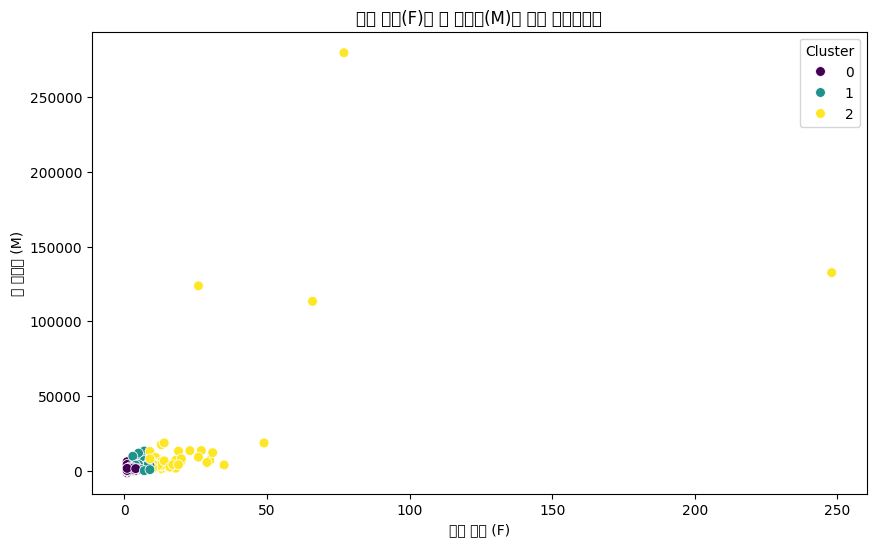

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='F', y='M', hue='Cluster', data=customer_data, palette='viridis', s=50)
plt.title('구매 빈도(F)와 총 구매액(M)에 따른 클러스터링')
plt.xlabel('구매 빈도 (F)')
plt.ylabel('총 구매액 (M)')
plt.show()

In [16]:
# 3-1 평균 속도 계산
def average_speed(distance, speed1, speed2):
    time1 = distance / speed1
    time2 = distance / speed2
    total_time = time1 + time2
    total_distance = 2 * distance
    average_speed = total_distance / total_time
    return average_speed

distance = 100  # km
speed1 = 100  # km/h
speed2 = 80  # km/h

avg_speed = average_speed(distance, speed1, speed2)
print(f"Average speed: {avg_speed:.2f} km/h")

Average speed: 88.89 km/h


In [17]:
import numpy as np

def average_growth_rate(sales):
    growth_rates = [sales[i] / sales[i-1] for i in range(1, len(sales))]
    avg_growth_rate = np.prod(growth_rates) ** (1 / len(growth_rates))
    return avg_growth_rate

sales = [3000, 4000, 5000]
avg_growth = average_growth_rate(sales)
print(f"Average growth rate: {avg_growth:.2f}")

Average growth rate: 1.29


In [19]:
# 3-3 남성 중에서 등산을 좋아할 확률 계산
def probability_of_hiking_preference(male_hiking, male_total):
    return male_hiking / male_total

male_hiking = 20
male_swimming = 10
male_total = male_hiking + male_swimming

probability_hiking = probability_of_hiking_preference(male_hiking, male_total)
print(f"Probability of males preferring hiking: {probability_hiking:.2f}")

Probability of males preferring hiking: 0.67
